In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Parameters wanted:
   *  Mass, radius, orbital period, host star metallicity, eccentricity, equilibrium temperature.
   * Semimajor axis a may be relevant too

In [3]:
file_US="/home/bolacha/University/Project/code/data2-example/selection_US.rdb"
file_EU="/home/bolacha/University/Project/code/data2-example/selection_EU.rdb"

In [5]:
def read_file(file, removeNaN=False, params=0):
    database = np.genfromtxt(file_EU, comments="--", skip_header=4,
                            dtype=None, delimiter="\t", encoding=None)
    df = pd.DataFrame(database)
    with open(file) as f:
        columns = f.readline()
    columns = columns.replace("\n", "")
    columns = columns.split('\t')
    n = len(columns)
    df = df.iloc[:,:n]
    df.columns = columns
    df = pd.DataFrame.set_index(df,keys='obj_id_catname')
    if params != 0:
        df = df[params]
    if removeNaN == True:
        df = pd.DataFrame.dropna(df,axis=0, how='any')
    return df
           
d_US_test = read_file(file_US)
d_US_test

,db_info_name,pub_info_detectiontype,obj_phys_mass_mjup,obj_phys_msini_mjup,obj_phys_radius_rjup,obj_orb_period_day,obj_orb_a_au,obj_orb_ecc,obj_parent_phys_teff_k,obj_parent_phys_feh,obj_orb_inc_deg
obj_id_catname,,,,,,,,,,,
BD+20 2457 b,Exoplanet.eu,Radial Velocity,NaN,21.4200,NaN,379.630000,1.4500,False,False,0.15,False
2MASS J2250+2325 b,Exoplanet.eu,Imaging,30.0000,NaN,NaN,NaN,518.0000,False,False,NaN,False
CoRoT-26 b,Exoplanet.eu,Transit,0.5200,NaN,1.260,4.204740,0.0526,False,False,0.00,False
EPIC 220194974 d,Exoplanet.eu,Transit,NaN,NaN,0.146,9.757900,0.0774,False,False,NaN,False
EPIC 248545986 d,Exoplanet.eu,Transit,0.0041,NaN,0.098,10.115000,0.0685,False,False,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
WASP-167 b,Exoplanet.eu,Transit,8.0000,NaN,1.510,2.021959,0.0365,False,False,NaN,False
WASP-25 b,Exoplanet.eu,Transit,0.5800,NaN,1.260,3.764830,0.0474,False,False,0.00,False
WD 0837+185 B,Exoplanet.eu,Radial Velocity,30.0000,25.0000,NaN,0.175000,0.0060,False,False,NaN,False


In [6]:
print(d_US_test.columns)
#param_list=['obj_phys_mass_mjup','obj_phys_radius_rjup',
 #'obj_orb_period_day','obj_parent_phys_feh','obj_orb_ecc','obj_parent_phys_teff_k']
    
d_US_test['obj_parent_phys_teff_k'] #----> eccentricity and T_eff are read as "False"

Index(['db_info_name', 'pub_info_detectiontype', 'obj_phys_mass_mjup',
       'obj_phys_msini_mjup', 'obj_phys_radius_rjup', 'obj_orb_period_day',
       'obj_orb_a_au', 'obj_orb_ecc', 'obj_parent_phys_teff_k',
       'obj_parent_phys_feh', 'obj_orb_inc_deg'],
      dtype='object')


obj_id_catname
BD+20 2457 b          False
2MASS J2250+2325 b    False
CoRoT-26 b            False
EPIC 220194974 d      False
EPIC 248545986 d      False
                      ...  
WASP-167 b            False
WASP-25 b             False
WD 0837+185 B         False
eta Cet c             False
tau Cet e             False
Name: obj_parent_phys_teff_k, Length: 4096, dtype: bool

In [9]:
#will be used for the first trial using mass and orbital period
param_MP=['obj_orb_period_day','obj_phys_mass_mjup']

#will be used for the second trial using mass, radius, temperature
param_MRP=['obj_phys_mass_mjup', 'obj_phys_radius_rjup','obj_parent_phys_teff_k']

M_US_MP, P_US_MP = d_US_MP['obj_phys_mass_mjup'], d_US_MP['obj_orb_period_day']
M_EU_MP, P_EU_MP = d_EU_MP['obj_phys_mass_mjup'], d_EU_MP['obj_orb_period_day']

In [10]:
d_US_MP=read_file(file_US,True,param_MP)
d_EU_MP=read_file(file_EU,True,param_MP)

We first aim to find three separate groups:
* Hot jupiters: P $\lesssim 7$ d, $M/M_J \leq 12$; centered around $\sim 1 M_J$ and $P \sim 3$ d; 
* Eccentric giants: $10^2 d \lesssim P \lesssim 10^4 d$; $1 \lesssim M/M_J \leq 10$.
* Ungiants: $P \leq 100 d$; $ M/M_J \lesssim 0.07$ and $R \lesssim 0.35 R_J$

$\rightarrow$ <u>Task 1:</u>  plottting mass vs period.

# mass vs orbital period

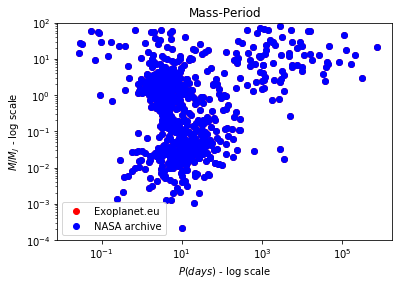

In [106]:
plt.scatter(P_EU_MP, M_EU_MP,label = "Exoplanet.eu",c='r')
plt.scatter(P_US_MP, M_US_MP,label = "NASA archive",c='b')
plt.ylabel(r"$M/M_J$ - log scale")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r"$P (days)$ - log scale")
plt.ylim(10e-5,10e1)
plt.legend()
plt.title(r"Mass-Period")
plt.show()

Which is a first visualization for the relationship between orbital period and mass, in the full range we're studying, and also reproduces the figure in my document.

We can already see the three separate groups.

In [28]:
d_US_MP

,obj_orb_period_day,obj_phys_mass_mjup
obj_id_catname,,
CoRoT-26 b,4.204740,0.5200
EPIC 248545986 d,10.115000,0.0041
HATS-13 b,3.044050,0.5430
HAT-P-31 b,5.005425,2.1710
K2-139 b,28.382290,0.3810
...,...,...
WASP-151 b,4.533471,0.3100
WASP-163 b,1.609688,1.8700
WASP-167 b,2.021959,8.0000


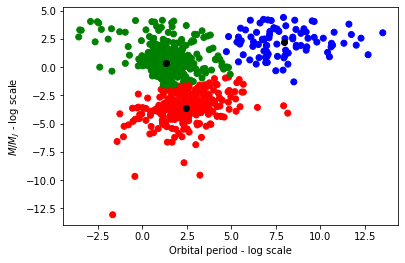

In [107]:
kmeans = KMeans(n_clusters=3).fit(np.log(d_US_MP))
centroids, labels = kmeans.cluster_centers_, kmeans.labels_
colors = ['r','b','g']
label_color=[]
for l in labels:
    label_color=np.append(label_color,colors[l])

plt.scatter(np.log(P_US_MP),np.log(M_US_MP),c=label_color)
plt.scatter(centroids[:, 0],centroids[:, 1],color='k')
plt.xlabel('Orbital period - log scale')
plt.ylabel(r'$M/M_J$ - log scale')
plt.show()

# mass-radius-temperature

To calculate $T_{eq}$, one needs a another parameter, the planet's bond Albedo $A_B$:

$$T_{eq}=T_{star} \sqrt{\frac{R}{2 a}}(1-A_{B})^{1 / 4}$$

(Will use solene's way of calculating Teq, first need to deal with the "False" values on the stellar temperature column)

In [264]:
d_US_MRP['obj_parent_phys_teff_k']

obj_id_catname
CoRoT-26 b          False
EPIC 248545986 d    False
HATS-13 b           False
HAT-P-31 b          False
K2-139 b            False
                    ...  
LP 358-499 c        False
WASP-151 b          False
WASP-163 b          False
WASP-167 b          False
WASP-25 b           False
Name: obj_parent_phys_teff_k, Length: 802, dtype: bool

I'll first plot mass-radius.

In [263]:
d_US_MRP = read_file(file_US, True, param_MRP)
d_EU_MRP = read_file(file_EU, True, param_MRP)

M_US_MRP, R_US_MRP,T_US_star = d_US_MRP['obj_phys_mass_mjup'], d_US_MRP['obj_phys_radius_rjup'], d_US_MRP['obj_parent_phys_teff_k']
M_EU_MRP, R_EU_MRP, T_EU_star = d_EU_MRP['obj_phys_mass_mjup'], d_EU_MRP['obj_phys_radius_rjup'], d_EU_MRP['obj_parent_phys_teff_k']

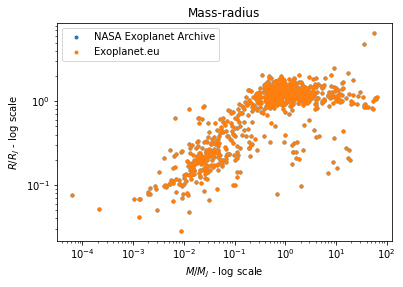

In [237]:
plt.plot(M_US_MRP, R_US_MRP, '.' ,label = "NASA Exoplanet Archive")
plt.plot(M_EU_MRP, R_EU_MRP, '.' ,label = "Exoplanet.eu")
plt.xlabel(r"$M/M_J$ - log scale")
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r"$R/R_J$ - log scale")
plt.title(r"Mass-radius")
plt.legend()
plt.show()